In [35]:
import pandas as pd

### 演習1

In [36]:
bi = pd.read_csv('ex3_biblio.csv', encoding='shift-jis')

print(bi.shape)
bi.head()

(5, 6)


,設置者,図書館数,"3,000冊未満","3,000〜9,999","10,000〜49,999","50,000冊以上"
0,都道府県,61,NaN,NaN,NaN,61
1,市（区）,2592,25.0,113.0,732.0,1722
2,町,549,2.0,11.0,186.0,350
3,村,46,NaN,6.0,26.0,14
4,組合等,26,NaN,3.0,15.0,8


In [37]:
bi.fillna(0, inplace=True)

print(bi.isnull().sum().sum())
bi.head()

0


,設置者,図書館数,"3,000冊未満","3,000〜9,999","10,000〜49,999","50,000冊以上"
0,都道府県,61,0.0,0.0,0.0,61
1,市（区）,2592,25.0,113.0,732.0,1722
2,町,549,2.0,11.0,186.0,350
3,村,46,0.0,6.0,26.0,14
4,組合等,26,0.0,3.0,15.0,8


In [38]:
bi.sort_values('図書館数', ascending=False)

,設置者,図書館数,"3,000冊未満","3,000〜9,999","10,000〜49,999","50,000冊以上"
1,市（区）,2592,25.0,113.0,732.0,1722
2,町,549,2.0,11.0,186.0,350
0,都道府県,61,0.0,0.0,0.0,61
3,村,46,0.0,6.0,26.0,14
4,組合等,26,0.0,3.0,15.0,8


### 演習2

In [39]:
phy = pd.read_csv('ex3_physicalSize.csv', encoding='shift-jis')

print(phy.shape)
phy.head()

(13, 5)


,年齢,身長_男,体重_男,身長_女,体重_女
0,5,110.4,18.9,109.4,18.5
1,6,116.5,21.3,115.5,20.8
2,7,122.5,23.9,121.5,23.4
3,8,128.1,26.9,127.3,26.4
4,9,133.5,30.4,133.4,29.7


In [40]:
phy.isnull().any()

年齢      False
身長_男    False
体重_男    False
身長_女    False
体重_女    False
dtype: bool

In [41]:
phy.isnull().sum()

年齢      0
身長_男    0
体重_男    0
身長_女    0
体重_女    0
dtype: int64

In [42]:
phy['BMI_男'] = phy['体重_男'] / (phy['身長_男'] / 100) ** 2
phy['BMI_女'] = phy['体重_女'] / (phy['身長_女'] / 100) ** 2

phy.head()

,年齢,身長_男,体重_男,身長_女,体重_女,BMI_男,BMI_女
0,5,110.4,18.9,109.4,18.5,15.506853,15.457423
1,6,116.5,21.3,115.5,20.8,15.693787,15.591912
2,7,122.5,23.9,121.5,23.4,15.926697,15.851242
3,8,128.1,26.9,127.3,26.4,16.392833,16.290977
4,9,133.5,30.4,133.4,29.7,17.057330,16.689556


In [43]:
power = pd.read_csv('ex3_power.csv', encoding='shift-jis')

print(power.shape)
power.head()

(26, 9)


,年齢,握力_男,上体起こし_男,反復横とび_男,50m走_男,握力_女,上体起こし_女,反復横とび_女,50m走_女
0,6,9.45,12.05,27.86,11.41,8.80,12.09,26.82,11.71
1,7,11.04,14.16,31.45,10.70,10.41,13.86,30.59,10.94
2,8,13.12,16.59,35.99,10.04,12.34,15.74,34.05,10.33
3,9,14.94,18.48,39.53,9.60,14.23,17.26,38.05,9.91
4,10,17.12,20.64,43.82,9.29,16.58,19.24,41.76,9.50


In [44]:
for i in phy.columns:
    print(i,':',phy[i].dtype)

年齢 : int64
身長_男 : float64
体重_男 : float64
身長_女 : float64
体重_女 : float64
BMI_男 : float64
BMI_女 : float64


In [45]:
for i in power.columns:
    print(i,':',power[i].dtype)

年齢 : object
握力_男 : float64
上体起こし_男 : float64
反復横とび_男 : float64
50m走_男 : float64
握力_女 : float64
上体起こし_女 : float64
反復横とび_女 : float64
50m走_女 : float64


In [46]:
# 元データを変更するには、上書きを利用する
phy['年齢'] = phy['年齢'].astype(str)

for i in phy.columns:
    print(i,':',phy[i].dtype)

年齢 : object
身長_男 : float64
体重_男 : float64
身長_女 : float64
体重_女 : float64
BMI_男 : float64
BMI_女 : float64


In [47]:
# phyとpowerで結合（merge）
merge = pd.merge(phy, power, how='inner', on='年齢')
merge.head()

,年齢,身長_男,体重_男,身長_女,体重_女,BMI_男,BMI_女,握力_男,上体起こし_男,反復横とび_男,50m走_男,握力_女,上体起こし_女,反復横とび_女,50m走_女
0,6,116.5,21.3,115.5,20.8,15.693787,15.591912,9.45,12.05,27.86,11.41,8.80,12.09,26.82,11.71
1,7,122.5,23.9,121.5,23.4,15.926697,15.851242,11.04,14.16,31.45,10.70,10.41,13.86,30.59,10.94
2,8,128.1,26.9,127.3,26.4,16.392833,16.290977,13.12,16.59,35.99,10.04,12.34,15.74,34.05,10.33
3,9,133.5,30.4,133.4,29.7,17.057330,16.689556,14.94,18.48,39.53,9.60,14.23,17.26,38.05,9.91
4,10,138.9,34.0,140.1,33.9,17.622780,17.271236,17.12,20.64,43.82,9.29,16.58,19.24,41.76,9.50


In [48]:
# concatはonやhowの指定ができない、一致する列がなければ合体させるだけとなる
concat = pd.concat([phy, power], axis=1)
concat.head()

,年齢,身長_男,体重_男,身長_女,体重_女,BMI_男,BMI_女,年齢,握力_男,上体起こし_男,反復横とび_男,50m走_男,握力_女,上体起こし_女,反復横とび_女,50m走_女
0,5,110.4,18.9,109.4,18.5,15.506853,15.457423,6,9.45,12.05,27.86,11.41,8.80,12.09,26.82,11.71
1,6,116.5,21.3,115.5,20.8,15.693787,15.591912,7,11.04,14.16,31.45,10.70,10.41,13.86,30.59,10.94
2,7,122.5,23.9,121.5,23.4,15.926697,15.851242,8,13.12,16.59,35.99,10.04,12.34,15.74,34.05,10.33
3,8,128.1,26.9,127.3,26.4,16.392833,16.290977,9,14.94,18.48,39.53,9.60,14.23,17.26,38.05,9.91
4,9,133.5,30.4,133.4,29.7,17.057330,16.689556,10,17.12,20.64,43.82,9.29,16.58,19.24,41.76,9.50


In [49]:
merge_man = merge[['年齢', '身長_男', '体重_男', 'BMI_男', '握力_男', '上体起こし_男', '反復横とび_男', '50m走_男']]

print(merge_man.shape)
merge_man.head()

(12, 8)


,年齢,身長_男,体重_男,BMI_男,握力_男,上体起こし_男,反復横とび_男,50m走_男
0,6,116.5,21.3,15.693787,9.45,12.05,27.86,11.41
1,7,122.5,23.9,15.926697,11.04,14.16,31.45,10.70
2,8,128.1,26.9,16.392833,13.12,16.59,35.99,10.04
3,9,133.5,30.4,17.057330,14.94,18.48,39.53,9.60
4,10,138.9,34.0,17.622780,17.12,20.64,43.82,9.29


In [50]:
# 列番号で指定する方が楽
merge_man = merge.iloc[:, [0, 1, 2, 5, 7, 8, 9, 10]]
merge_man.head()

,年齢,身長_男,体重_男,BMI_男,握力_男,上体起こし_男,反復横とび_男,50m走_男
0,6,116.5,21.3,15.693787,9.45,12.05,27.86,11.41
1,7,122.5,23.9,15.926697,11.04,14.16,31.45,10.70
2,8,128.1,26.9,16.392833,13.12,16.59,35.99,10.04
3,9,133.5,30.4,17.057330,14.94,18.48,39.53,9.60
4,10,138.9,34.0,17.622780,17.12,20.64,43.82,9.29


In [51]:
s3 = 'sample.jpg'

# 文字末尾がどれかに該当していれば、Trueが返される
s3.endswith(('jpg', 'gif', 'png'))

True

In [52]:
col = merge.columns
col_man = col[col.str.endswith('男')] # []内はbool型

merge_man = merge[col_man]
merge_man.head()

,身長_男,体重_男,BMI_男,握力_男,上体起こし_男,反復横とび_男,50m走_男
0,116.5,21.3,15.693787,9.45,12.05,27.86,11.41
1,122.5,23.9,15.926697,11.04,14.16,31.45,10.70
2,128.1,26.9,16.392833,13.12,16.59,35.99,10.04
3,133.5,30.4,17.057330,14.94,18.48,39.53,9.60
4,138.9,34.0,17.622780,17.12,20.64,43.82,9.29


In [53]:
merge_man.query('150 <= 身長_男 < 170')

,身長_男,体重_男,BMI_男,握力_男,上体起こし_男,反復横とび_男,50m走_男
6,152.6,43.9,18.851914,23.93,24.39,49.80,8.50
7,159.8,48.8,19.110246,29.66,28.09,53.28,7.84
8,165.1,53.9,19.774004,35.12,30.26,56.01,7.47
9,168.3,59.0,20.829737,37.87,29.53,55.43,7.47
10,169.8,60.6,21.018284,40.45,31.56,57.29,7.29


In [54]:
merge_man[(merge_man.身長_男 >= 150) & (merge_man.身長_男 < 170)]

,身長_男,体重_男,BMI_男,握力_男,上体起こし_男,反復横とび_男,50m走_男
6,152.6,43.9,18.851914,23.93,24.39,49.80,8.50
7,159.8,48.8,19.110246,29.66,28.09,53.28,7.84
8,165.1,53.9,19.774004,35.12,30.26,56.01,7.47
9,168.3,59.0,20.829737,37.87,29.53,55.43,7.47
10,169.8,60.6,21.018284,40.45,31.56,57.29,7.29


### 演習3

In [55]:
qn = pd.read_csv('ex3_来店アンケート.csv', encoding='shift-jis', engine='python')

print(qn.shape)
qn.head()

(100, 5)


,年齢,来店のきっかけ,雰囲気の満足度,サービスの満足度,味の満足度
0,41,1,3,5,3
1,30,3,4,2,4
2,29,5,5,4,4
3,48,3,5,4,5
4,27,5,5,4,4


In [56]:
print(qn.年齢.describe())

count    100.000000
mean      34.210000
std        8.914062
min       14.000000
25%       27.750000
50%       34.500000
75%       41.000000
max       55.000000
Name: 年齢, dtype: float64


In [57]:
# グループ集計
qn.groupby('来店のきっかけ').agg({'味の満足度': ['count'], '年齢': ['mean']})

,味の満足度,年齢
,count,mean
来店のきっかけ,,
1,10,38.900000
2,26,34.115385
3,32,29.875000
4,8,41.125000
5,19,35.157895
6,5,38.400000


In [58]:
# groupby('インデックス')['値'].統計量
group = qn.groupby('来店のきっかけ')['年齢'].count()
group.head()

来店のきっかけ
1    10
2    26
3    32
4     8
5    19
Name: 年齢, dtype: int64

In [59]:
df_group = pd.DataFrame(group)
df_group.columns = ['人数']
df_group.head()

,人数
来店のきっかけ,
1,10
2,26
3,32
4,8
5,19


In [60]:
df_group['年齢'] = qn.groupby('来店のきっかけ').年齢.mean()
df_group.head()

,人数,年齢
来店のきっかけ,,
1,10,38.900000
2,26,34.115385
3,32,29.875000
4,8,41.125000
5,19,35.157895


In [63]:
# クロス集計
qn.pivot_table('年齢', aggfunc='count', index='来店のきっかけ')

# agg：groupby、aggfun：pivot_table

,年齢
来店のきっかけ,
1,10
2,26
3,32
4,8
5,19
6,5


In [62]:
# columnsで、数値別に表示ができる
qn.pivot_table('年齢', aggfunc='count', index='来店のきっかけ' ,columns='雰囲気の満足度', fill_value=0)

雰囲気の満足度,1,2,3,4,5
来店のきっかけ,,,,,
1,4,3,2,1,0
2,2,8,8,6,2
3,0,1,1,11,19
4,1,3,3,1,0
5,0,0,1,5,13
6,1,1,1,1,1


### 演習4

In [122]:
money = pd.read_csv('ex3_仮想通貨価格_20180930.csv', engine='python', encoding='shift-jis')

money.head()

,date,終値,始値,高値,安値
0,2014年9月17日,48559.0,49299.0,50653.0,47561.0
1,2014年9月18日,NaN,NaN,NaN,NaN
2,2014年9月19日,NaN,NaN,NaN,NaN
3,2014年9月20日,43939.0,43370.0,46160.0,42253.0
4,2014年9月21日,NaN,NaN,NaN,NaN


In [123]:
import numpy as np
a = np.array([1,2,3])

# DataFrameはdtypes（複数形）
print(a.dtype)
print(money.dtypes)

int32
date     object
終値      float64
始値      float64
高値      float64
安値      float64
dtype: object


In [124]:
# Kaggleでよく使いそう
money['date'] = pd.to_datetime(money['date'], format='%Y年%m月%d日')
money.head()

,date,終値,始値,高値,安値
0,2014-09-17,48559.0,49299.0,50653.0,47561.0
1,2014-09-18,NaN,NaN,NaN,NaN
2,2014-09-19,NaN,NaN,NaN,NaN
3,2014-09-20,43939.0,43370.0,46160.0,42253.0
4,2014-09-21,NaN,NaN,NaN,NaN


In [125]:
# dtで年・月・日を指定できる
money_201501 = money[(money.date.dt.year == 2015) & (money.date.dt.month == 1)]
money_201501.head()

,date,終値,始値,高値,安値
106,2015-01-01,37921.0,38492.0,38569.0,37177.0
107,2015-01-02,38023.0,38182.0,38615.0,37671.0
108,2015-01-03,37642.0,38023.0,38301.0,35018.0
109,2015-01-04,34015.0,36997.0,38018.0,31061.0
110,2015-01-05,32724.0,34080.0,35147.0,31014.0


In [126]:
money_201501.dropna()
a = money_201501['高値'].mean()

In [127]:
money_201801 = money[(money.date.dt.year == 2018) & (money.date.dt.month == 1)]
money_201501.head()

,date,終値,始値,高値,安値
106,2015-01-01,37921.0,38492.0,38569.0,37177.0
107,2015-01-02,38023.0,38182.0,38615.0,37671.0
108,2015-01-03,37642.0,38023.0,38301.0,35018.0
109,2015-01-04,34015.0,36997.0,38018.0,31061.0
110,2015-01-05,32724.0,34080.0,35147.0,31014.0


In [128]:
money_201801.dropna()
b = money_201801['高値'].mean()

In [129]:
print(b / a)

50.317798830661445


In [130]:
money.head()

,date,終値,始値,高値,安値
0,2014-09-17,48559.0,49299.0,50653.0,47561.0
1,2014-09-18,NaN,NaN,NaN,NaN
2,2014-09-19,NaN,NaN,NaN,NaN
3,2014-09-20,43939.0,43370.0,46160.0,42253.0
4,2014-09-21,NaN,NaN,NaN,NaN


In [131]:
money.set_index('date', inplace=True)
money.head()

,終値,始値,高値,安値
date,,,,
2014-09-17,48559.0,49299.0,50653.0,47561.0
2014-09-18,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN
2014-09-20,43939.0,43370.0,46160.0,42253.0
2014-09-21,NaN,NaN,NaN,NaN


In [133]:
# resample：Dを指定するとデータを日ごとに表示、interpolate：linearを指定すると線形補完
endprice = money['終値'].resample('D').interpolate('linear')
endprice[:5]

date
2014-09-17    48559.0
2014-09-18    47019.0
2014-09-19    45479.0
2014-09-20    43939.0
2014-09-21    43458.5
Freq: D, Name: 終値, dtype: float64

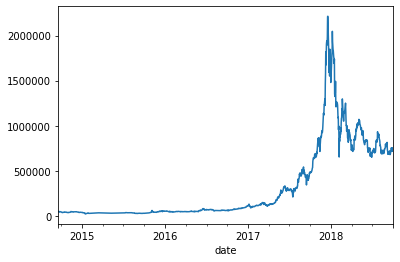

In [136]:
%matplotlib inline
endprice.plot()

### 演習5

In [150]:
panda_test = pd.read_csv('panda_test.csv', engine='python', encoding='shift-jis')
panda_test.to_csv('panda2.csv')

panda_test.head()

,PassengerId,Satisfied,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,"Sato, Mr. Ren",21.0,1,0,A/5 211711,870.000,NaN,Tokyo
1,2,1,1,female,"Suzuki, Mrs. Himari",37.0,1,0,PC 175991,8553.996,C85,Osaka
2,3,1,3,female,"Tanaka, Miss. Mei",25.0,0,0,STON/O2. 31012821,951.000,NaN,NaN
3,4,1,1,female,"Ito, Mrs. Riko",34.0,1,0,227606,6372.000,C123,Tokyo
4,5,0,3,male,"Takahashi, Mr. Haruto",34.0,0,0,746900,966.000,NaN,Tokyo


In [151]:
# カテゴリカルに分けなくても、指定した列だけOne-Hotできる
titanic = pd.get_dummies(panda_test, columns=['Sex', 'Embarked'])
titanic.head()

,PassengerId,Satisfied,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_Nagoya,Embarked_Osaka,Embarked_Tokyo
0,1,0,3,"Sato, Mr. Ren",21.0,1,0,A/5 211711,870.000,NaN,0,1,0,0,1
1,2,1,1,"Suzuki, Mrs. Himari",37.0,1,0,PC 175991,8553.996,C85,1,0,0,1,0
2,3,1,3,"Tanaka, Miss. Mei",25.0,0,0,STON/O2. 31012821,951.000,NaN,1,0,0,0,0
3,4,1,1,"Ito, Mrs. Riko",34.0,1,0,227606,6372.000,C123,1,0,0,0,1
4,5,0,3,"Takahashi, Mr. Haruto",34.0,0,0,746900,966.000,NaN,0,1,0,0,1


In [152]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

print(titanic['Age'].isnull().sum())
titanic.head()

0


,PassengerId,Satisfied,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_Nagoya,Embarked_Osaka,Embarked_Tokyo
0,1,0,3,"Sato, Mr. Ren",21.0,1,0,A/5 211711,870.000,NaN,0,1,0,0,1
1,2,1,1,"Suzuki, Mrs. Himari",37.0,1,0,PC 175991,8553.996,C85,1,0,0,1,0
2,3,1,3,"Tanaka, Miss. Mei",25.0,0,0,STON/O2. 31012821,951.000,NaN,1,0,0,0,0
3,4,1,1,"Ito, Mrs. Riko",34.0,1,0,227606,6372.000,C123,1,0,0,0,1
4,5,0,3,"Takahashi, Mr. Haruto",34.0,0,0,746900,966.000,NaN,0,1,0,0,1


In [154]:
pd.crosstab(panda_test['Sex'], panda_test['Satisfied'], normalize='index')

Satisfied,0,1
Sex,,
female,0.181818,0.818182
male,0.888889,0.111111


### 参考文献

2点間の線形補間を計算する：https://qiita.com/niusounds/items/c4af702b06582590c82e<br>
Scipy.interpolate を使った様々な補間法:https://qiita.com/maskot1977/items/913ef108ff1e2ba5b63f